   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
Accuracy: 92.98%
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91        43
           1       0.96      0.93      0.94        71

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



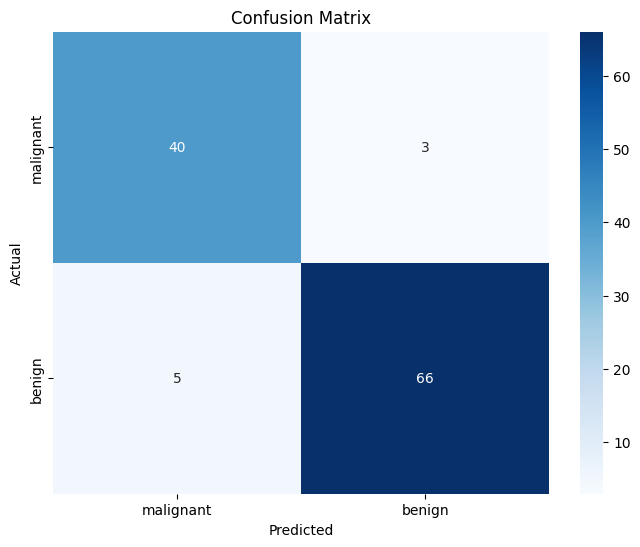

In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
#-----------------------DATA------------------------#
#1.LOAD DATASET
data=load_breast_cancer()
df=pd.DataFrame(data.data,columns=data.feature_names)
df["target"]=data.target

#keep only 5 important features
df_small=df[['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'target']]
#2.split dataset
x=df_small.drop(columns=["target"])
y=df_small["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

#-----------------------MODEL------------------------#

#3.train logistic regression
model=LogisticRegression()
model.fit(x_train,y_train)

#4.evaluate model
y_pred=model.predict(x_test)
y_prob=model.predict_proba(x_test)[:,1]
